In [30]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline

#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

In [31]:
# Load the dataset
file_path = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\ap_data_7.csv'
ap_data = pd.read_csv(file_path)

In [32]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = ap_data.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 7
Number of rows: 71853


In [33]:
#check the statistics of the data per columns
ap_data.describe()

,channel,signal_strength,floorid
count,71853.000000,71853.000000,71853.000000
mean,2443.359721,-72.796668,160.217096
std,17.671963,12.288696,78.244899
min,2412.000000,-107.000000,1.000000
25%,2427.000000,-83.000000,110.000000
50%,2447.000000,-72.000000,169.000000
75%,2462.000000,-64.000000,223.000000
max,2462.000000,-5.000000,289.000000


In [34]:
#Check the columns names
col_names = ap_data.columns.values
col_names

array(['mac_address', 'ssid', 'channel', 'source', 'signal_strength',
       'floorid', 'timestamp'], dtype=object)

In [35]:
#check for missing values
missing_values_count = ap_data.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(ap_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


In [36]:
# Add a new column 'source_without_C' by removing 'C' from 'source'
ap_data['ssid'] = ap_data['ssid'].str.replace('C', '')

# Convert the 'source_without_C' column to numeric
ap_data['ssid'] = pd.to_numeric(ap_data['ssid'], errors='coerce')

In [37]:
ap_data = ap_data.drop(['mac_address'], axis=1)

#Check the columns names
col_names = ap_data.columns.values
col_names

array(['ssid', 'channel', 'source', 'signal_strength', 'floorid',
       'timestamp'], dtype=object)

In [38]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = ap_data["ssid"].unique()
unique_channel = ap_data["channel"].unique()
unique_floorid = ap_data["floorid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))

unique_floorid_count = ap_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel : [2447 2442 2452 2437 2432 2427 2422 2457 2417 2462 2412]
Unique Floor ID : [189 188 187 186 185 184 183 182 181 171 172 173 174 175 176 177 178 179
 161 162 163 164 165 166 151 152 153 154 155 156 141 142 143 144 145 146
 131 132 133 134 135 136 121 122 123 124 125 126 111 112 113 114 115 116
 101 102 103 104 105 106 180 167 168 169 170 157 158 159 160 147 148 149
 150 137 138 139 140 127 128 129 130 117 118 119 120 107 108 109 110  78
  69  60  51  42  33  24   7   8  15  16  25  23  32  41  50  59  68  77
   6   5   4   3   2   1  52  43  34  61  70  79  71  62  53  44  35  26
  17   9  10  11  12  13  14  18  20  21  22  27  28  29  30  31  36  37
  38  39  40  45  46  47  48  49  54 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235  55  56  57  58  63  64  65  66  67  72  73  74  75  76  19 236 237
 238 239 240

In [49]:
# Define the columns for duplication check
duplication_columns = ['ssid', 'channel', 'source', 'signal_strength', 'floorid']

# Count the number of occurrences for each combination of columns
ap_data['duplication_count'] = ap_data.groupby(duplication_columns)['ssid'].transform('count')

# Filter rows where duplication count is greater than or equal to 4
filtered_data = ap_data[ap_data['duplication_count'] >= 6]

# Save the result to a new CSV file or modify the original dataframe as needed
filtered_data.to_csv('filtered_data.csv', index=False)

print(filtered_data)

# Group by duplication columns and aggregate values using, for example, the mean
merged_data = filtered_data.groupby(duplication_columns, as_index=False).mean()

# Drop the 'duplication_count' column if you don't need it in the final result
merged_data = merged_data.drop(columns=['duplication_count'])

# Save the result to a new CSV file or modify the original dataframe as needed
merged_data.to_csv('merged_data.csv', index=False)

print(merged_data)

       ssid  channel source  signal_strength  floorid            timestamp  \
1         2     2447   cap2              -69      189  2023-11-28 09:13:48   
4         1     2437   cap3              -80      189  2023-11-28 09:13:50   
6         2     2447   cap2              -69      189  2023-11-28 09:13:50   
7         1     2437   cap3              -80      189  2023-11-28 09:13:51   
11        2     2447   cap2              -69      189  2023-11-28 09:13:51   
...     ...      ...    ...              ...      ...                  ...   
71844     2     2422   cap3              -76      289  2023-12-07 11:48:03   
71846     2     2412   cap1              -92      289  2023-12-07 11:48:03   
71847     2     2412   cap1              -92      289  2023-12-07 11:48:04   
71848     2     2422   cap3              -76      289  2023-12-07 11:48:04   
71852     2     2412   cap1              -92      289  2023-12-07 11:48:05   

       duplication_count  
1                      6  
4        

In [50]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = merged_data["ssid"].unique()
unique_channel = merged_data["channel"].unique()
unique_floorid = merged_data["floorid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel : {}'.format(unique_channel))
print('Unique Floor ID : {}'.format(unique_floorid))

unique_floorid_count = merged_data["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel : [2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Unique Floor ID : [219 231 233 190 192 234 191 218 228 230 222 225 235 217 221 214 232 220
 216 224 227 223 226 229 215 195 136 101 160 163 166 161 162 131 127 119
 140 170 196 194 122 164 102 111 121 142 156 153 103 145 165 113 159 168
 169 148 130 151 141 149 158 125 147 178 193 106 176 183 167 180 185 171
 181 150 135 157 173 146 177 117 112 124 174 115 154 182 107 138 152 128
 108 137 129 109 110 139 132 104 143 133 114 126 144 172 188 116 118 123
 120 189 175 187 179 274 268 254 282 261 288 283 105 186 155 184 255 289
 263 267 257 258 260 284 286 134 259 251 269 253 271 287 250 276 280 266
 272 265 201 209 212 211 205 207 210 213 197 202 203 206 200  66  41  74
  11  67  50  55  18  35  73   1  32  20  68  21  33  57 198 256 208 262
 252  43  60 239   2   3  59  23  24  63  75   5  56  15  16  51  58  77
  34  65   6  53  54  26  72  64  46  28  45  47  62  22  30  69  36  31
  70 275 281

In [51]:
# Count unique channels for each ssid, floorid, and source
merge_data = merged_data.groupby(['ssid', 'floorid', 'source'])['channel'].nunique().reset_index()

print(merge_data)

      ssid  floorid source  channel
0        1        1   cap1        2
1        1        1   cap2        3
2        1        2   cap1        1
3        1        2   cap2        1
4        1        3   cap1        2
...    ...      ...    ...      ...
1113     2      286   cap3        2
1114     2      287   cap3        2
1115     2      288   cap3        2
1116     2      289   cap1        1
1117     2      289   cap3        2

[1118 rows x 4 columns]


In [52]:
# Define a custom aggregation function to calculate the product
def calculate_product(x):
    return x.prod()

# Group by 'ssid' and 'floorid', then aggregate using the custom function
result = merge_data.groupby(['ssid', 'floorid']).agg({
    'channel': calculate_product
}).reset_index()

# Display the result
print(result)

# Continue from the previous code
total_sum_combination = result['channel'].sum()

# Display the total sum
print("Total Sum of 'channel' values:", total_sum_combination)


     ssid  floorid  channel
0       1        1        6
1       1        2        1
2       1        3        2
3       1        4        1
4       1        5        2
..    ...      ...      ...
522     2      285        1
523     2      286        2
524     2      287        2
525     2      288        2
526     2      289        2

[527 rows x 3 columns]
Total Sum of 'channel' values: 1277


In [53]:
# Count the number of unique sources per 'ssid' and 'floorid'
result_counts = merge_data.groupby(['ssid', 'floorid'])['source'].nunique().reset_index()

# Rename the column to indicate the count of sources
result_counts = result_counts.rename(columns={'source': 'source_count'})

# Display the result
print(result_counts)

# Save the result to a new CSV file or modify the original dataframe as needed
result_counts.to_csv('source_count.csv', index=False)

     ssid  floorid  source_count
0       1        1             2
1       1        2             2
2       1        3             2
3       1        4             2
4       1        5             2
..    ...      ...           ...
522     2      285             2
523     2      286             1
524     2      287             1
525     2      288             1
526     2      289             2

[527 rows x 3 columns]


In [54]:
# Calculate total RSSI for each unique channel within each ssid, floorid, and source
total_number_rssi = merged_data.groupby(['ssid', 'floorid', 'source', 'channel'])['signal_strength'].nunique().reset_index()

print(total_number_rssi)

      ssid  floorid source  channel  signal_strength
0        1        1   cap1     2457                1
1        1        1   cap1     2462                4
2        1        1   cap2     2452                2
3        1        1   cap2     2457                1
4        1        1   cap2     2462                1
...    ...      ...    ...      ...              ...
1710     2      288   cap3     2417                2
1711     2      288   cap3     2422                4
1712     2      289   cap1     2412                2
1713     2      289   cap3     2417                3
1714     2      289   cap3     2422                3

[1715 rows x 5 columns]


In [55]:
import pandas as pd
from itertools import product


# Step 1: Extract unique combinations of 'ssid' and 'floorid'
combinations = merged_data[['ssid', 'floorid']].drop_duplicates()

# Step 2: Calculate unique channels for each source
channel_counts = {}
for index, row in combinations.iterrows():
    ssid, floorid = row['ssid'], row['floorid']
    channels = merged_data[(merged_data['ssid'] == ssid) & (merged_data['floorid'] == floorid)].groupby('source')['channel'].unique()
    channel_counts[(ssid, floorid)] = channels
    
print(channel_counts)

# Step 3 and 4: Generate combinations and create DataFrame
combinations_list = []
for (ssid, floorid), channels in channel_counts.items():
    for source, channel_list in channels.items():
        for channel in channel_list:
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()
            
            total_signal_strengths = len(signal_strengths)
            
            print(f'SSID: {ssid}, FloorID: {floorid}, Total Number of Signal Strength for {source} channel {channel}: {total_signal_strengths}')
            
            combination = [ssid, floorid, source, f'channel_{channel}_signal_strength_{source}', signal_strengths]
            combinations_list.append(combination)

print(combinations_list)


{(1, 219): source
cap1                [2412]
cap3    [2412, 2417, 2422]
Name: channel, dtype: object, (1, 231): source
cap1                [2412]
cap3    [2417, 2422, 2427]
Name: channel, dtype: object, (1, 233): source
cap1    [2412]
cap3    [2417]
Name: channel, dtype: object, (1, 190): source
cap1          [2412]
cap2          [2412]
cap3    [2417, 2422]
Name: channel, dtype: object, (1, 192): source
cap1          [2412]
cap3    [2422, 2437]
Name: channel, dtype: object, (1, 234): source
cap1                [2412]
cap3    [2412, 2417, 2422]
Name: channel, dtype: object, (1, 191): source
cap1          [2412]
cap2          [2412]
cap3    [2417, 2422]
Name: channel, dtype: object, (1, 218): source
cap1                [2412]
cap3    [2412, 2417, 2422]
Name: channel, dtype: object, (1, 228): source
cap1    [2412]
cap3    [2417]
Name: channel, dtype: object, (1, 230): source
cap1                [2412]
cap3    [2412, 2417, 2422]
Name: channel, dtype: object, (1, 222): source
cap1          

SSID: 1, FloorID: 162, Total Number of Signal Strength for cap2 channel 2427: 1
SSID: 1, FloorID: 162, Total Number of Signal Strength for cap2 channel 2432: 1
SSID: 1, FloorID: 162, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 162, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 162, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 131, Total Number of Signal Strength for cap1 channel 2442: 2
SSID: 1, FloorID: 131, Total Number of Signal Strength for cap2 channel 2427: 1
SSID: 1, FloorID: 131, Total Number of Signal Strength for cap3 channel 2432: 1
SSID: 1, FloorID: 131, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 127, Total Number of Signal Strength for cap2 channel 2427: 1
SSID: 1, FloorID: 127, Total Number of Signal Strength for cap2 channel 2432: 1
SSID: 1, FloorID: 127, Total Number of Signal Strength for cap3 channel 2437: 1
SSID: 1, FloorID: 119, Total Number of S

SSID: 1, FloorID: 174, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 174, Total Number of Signal Strength for cap3 channel 2437: 3
SSID: 1, FloorID: 115, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 1, FloorID: 115, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 115, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 115, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap2 channel 2437: 1
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap2 channel 2442: 2
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap3 channel 2437: 2
SSID: 1, FloorID: 154, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 182, Total Number of S

SSID: 1, FloorID: 155, Total Number of Signal Strength for cap1 channel 2442: 2
SSID: 1, FloorID: 155, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 155, Total Number of Signal Strength for cap2 channel 2447: 1
SSID: 1, FloorID: 155, Total Number of Signal Strength for cap3 channel 2442: 3
SSID: 1, FloorID: 184, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 1, FloorID: 184, Total Number of Signal Strength for cap1 channel 2447: 2
SSID: 1, FloorID: 184, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 184, Total Number of Signal Strength for cap3 channel 2442: 2
SSID: 1, FloorID: 255, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 1, FloorID: 289, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 1, FloorID: 289, Total Number of Signal Strength for cap3 channel 2447: 2
SSID: 1, FloorID: 263, Total Number of Signal Strength for cap3 channel 2442: 2
SSID: 1, FloorID: 263, Total Number of S

SSID: 1, FloorID: 55, Total Number of Signal Strength for cap2 channel 2462: 2
SSID: 1, FloorID: 18, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 1, FloorID: 18, Total Number of Signal Strength for cap2 channel 2452: 1
SSID: 1, FloorID: 18, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 1, FloorID: 35, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 1, FloorID: 35, Total Number of Signal Strength for cap2 channel 2452: 2
SSID: 1, FloorID: 35, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 35, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 1, FloorID: 73, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 1, FloorID: 73, Total Number of Signal Strength for cap2 channel 2452: 1
SSID: 1, FloorID: 73, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 73, Total Number of Signal Strength for cap2 channel 2462: 2
SSID: 1, FloorID: 1, Total Number of Signal Strength

SSID: 1, FloorID: 46, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 1, FloorID: 46, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 1, FloorID: 28, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 1, FloorID: 28, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 28, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 1, FloorID: 45, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 1, FloorID: 45, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 45, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 1, FloorID: 47, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 1, FloorID: 47, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 1, FloorID: 62, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 1, FloorID: 62, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 1, FloorID: 62, Total Number of Signal Strengt

SSID: 2, FloorID: 225, Total Number of Signal Strength for cap3 channel 2427: 4
SSID: 2, FloorID: 218, Total Number of Signal Strength for cap1 channel 2412: 4
SSID: 2, FloorID: 218, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 218, Total Number of Signal Strength for cap3 channel 2422: 4
SSID: 2, FloorID: 224, Total Number of Signal Strength for cap1 channel 2412: 4
SSID: 2, FloorID: 224, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 224, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 224, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 224, Total Number of Signal Strength for cap3 channel 2427: 3
SSID: 2, FloorID: 226, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 226, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 233, Total Number of Signal Strength for cap1 channel 2412: 3
SSID: 2, FloorID: 233, Total Number of S

SSID: 2, FloorID: 244, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap1 channel 2412: 2
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 247, Total Number of Signal Strength for cap3 channel 2427: 1
SSID: 2, FloorID: 254, Total Number of Signal Strength for cap1 channel 2412: 1
SSID: 2, FloorID: 254, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 254, Total Number of Signal Strength for cap3 channel 2412: 1
SSID: 2, FloorID: 254, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 254, Total Number of Signal Strength for cap3 channel 2422: 1
SSID: 2, FloorID: 254, Total Number of S

SSID: 2, FloorID: 75, Total Number of Signal Strength for cap1 channel 2417: 1
SSID: 2, FloorID: 75, Total Number of Signal Strength for cap1 channel 2422: 2
SSID: 2, FloorID: 75, Total Number of Signal Strength for cap2 channel 2422: 1
SSID: 2, FloorID: 232, Total Number of Signal Strength for cap3 channel 2417: 3
SSID: 2, FloorID: 232, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 287, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 287, Total Number of Signal Strength for cap3 channel 2422: 3
SSID: 2, FloorID: 286, Total Number of Signal Strength for cap3 channel 2417: 4
SSID: 2, FloorID: 286, Total Number of Signal Strength for cap3 channel 2422: 4
SSID: 2, FloorID: 288, Total Number of Signal Strength for cap3 channel 2417: 2
SSID: 2, FloorID: 288, Total Number of Signal Strength for cap3 channel 2422: 4
SSID: 2, FloorID: 215, Total Number of Signal Strength for cap3 channel 2417: 1
SSID: 2, FloorID: 215, Total Number of Sign

SSID: 2, FloorID: 125, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 2, FloorID: 125, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 2, FloorID: 125, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 125, Total Number of Signal Strength for cap3 channel 2462: 3
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap1 channel 2442: 2
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap2 channel 2442: 1
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap3 channel 2442: 1
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 121, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 134, Total Number of Signal Strength for cap1 channel 2442: 1
SSID: 2, FloorID: 134, Total Number of S

SSID: 2, FloorID: 21, Total Number of Signal Strength for cap2 channel 2452: 1
SSID: 2, FloorID: 21, Total Number of Signal Strength for cap2 channel 2457: 1
SSID: 2, FloorID: 21, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 2, FloorID: 201, Total Number of Signal Strength for cap3 channel 2452: 4
SSID: 2, FloorID: 201, Total Number of Signal Strength for cap3 channel 2457: 2
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap2 channel 2457: 2
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 167, Total Number of Signal Strength for cap3 channel 2462: 1
SSID: 2, FloorID: 200, Total Number of Signal Strength for cap3 channel 2452: 1
SSID: 2, FloorID: 200, Total Number of Sign

SSID: 2, FloorID: 103, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 103, Total Number of Signal Strength for cap3 channel 2462: 1
SSID: 2, FloorID: 146, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 2, FloorID: 146, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 146, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 146, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 145, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 2, FloorID: 145, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 2, FloorID: 145, Total Number of Signal Strength for cap3 channel 2457: 1
SSID: 2, FloorID: 145, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 130, Total Number of Signal Strength for cap1 channel 2462: 4
SSID: 2, FloorID: 130, Total Number of Signal Strength for cap2 channel 2462: 2
SSID: 2, FloorID: 130, Total Number of S

SSID: 2, FloorID: 119, Total Number of Signal Strength for cap3 channel 2462: 1
SSID: 2, FloorID: 156, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 2, FloorID: 156, Total Number of Signal Strength for cap2 channel 2462: 2
SSID: 2, FloorID: 156, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 120, Total Number of Signal Strength for cap1 channel 2462: 1
SSID: 2, FloorID: 120, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 120, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 115, Total Number of Signal Strength for cap1 channel 2462: 2
SSID: 2, FloorID: 115, Total Number of Signal Strength for cap2 channel 2462: 3
SSID: 2, FloorID: 115, Total Number of Signal Strength for cap3 channel 2462: 2
SSID: 2, FloorID: 168, Total Number of Signal Strength for cap1 channel 2462: 3
SSID: 2, FloorID: 168, Total Number of Signal Strength for cap2 channel 2462: 1
SSID: 2, FloorID: 168, Total Number of S

In [56]:
# Step 5: Combine the RSSI from each row
combined_rssi = pd.DataFrame(columns=['ssid', 'floorid', 'channel_cap1', 'channel_cap2', 'channel_cap3', 'signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'])

for (ssid, floorid), channels in channel_counts.items():
    product_list = product(*(channels[source] for source in channels.keys()))

    for combination in product_list:
        row = {'ssid': ssid, 'floorid': floorid}
        for i, (source, channel) in enumerate(zip(channels.keys(), combination), start=1):
            row[f'channel_{source}'] = channel
            signal_strengths = merged_data[
                (merged_data['ssid'] == ssid) &
                (merged_data['floorid'] == floorid) &
                (merged_data['source'] == source) &
                (merged_data['channel'] == channel)
            ]['signal_strength'].tolist()

            row[f'signal_strength_cap{i}'] = signal_strengths if signal_strengths else None

        combined_rssi = combined_rssi.append(row, ignore_index=True)
        
# Replace NaN in 'channel' column with 1
combined_rssi['channel_cap1'].fillna(0, inplace=True)
combined_rssi['channel_cap2'].fillna(0, inplace=True)
combined_rssi['channel_cap3'].fillna(0, inplace=True)

# Replace NaN in 'singal_strength' column with 100
combined_rssi['signal_strength_cap1'].fillna(100, inplace=True)
combined_rssi['signal_strength_cap2'].fillna(100, inplace=True)
combined_rssi['signal_strength_cap3'].fillna(100, inplace=True)

print(combined_rssi)

     ssid floorid  channel_cap1  channel_cap2  channel_cap3  \
0       1     219          2412             0          2412   
1       1     219          2412             0          2417   
2       1     219          2412             0          2422   
3       1     231          2412             0          2417   
4       1     231          2412             0          2422   
...   ...     ...           ...           ...           ...   
1272    2     168          2462          2462          2462   
1273    2     147          2462          2462          2462   
1274    2     139          2462          2462          2462   
1275    2     170             0          2462          2462   
1276    2      29             0          2462             0   

      signal_strength_cap1 signal_strength_cap2  signal_strength_cap3  
0               [-94, -90]                [-67]                   100  
1               [-94, -90]                [-66]                   100  
2               [-94, -90] 

In [57]:
# Step 6: Combine the RSSI from each row
combined_rssi_final = pd.DataFrame(columns=combined_rssi.columns)  # Initialize an empty DataFrame

for index, row in combined_rssi.head(total_sum_combination).iterrows():  # Iterate only over the first 9 rows
    ssid, floorid, channel_cap1, channel_cap2, channel_cap3 = row['ssid'], row['floorid'], row['channel_cap1'], row['channel_cap2'], row['channel_cap3']
    
    # Create all possible combinations of signal strengths
    signal_strengths = [row['signal_strength_cap1'], row['signal_strength_cap2'], row['signal_strength_cap3']]
    
    # Handle the case where signal strength is an integer (100)
    signal_combinations = [signal if isinstance(signal, list) else [signal] for signal in signal_strengths]
    
    for signal_combination in product(*signal_combinations):
        combined_rssi_final = combined_rssi_final.append({
            'ssid': ssid,
            'floorid': floorid,
            'channel_cap1': channel_cap1,
            'channel_cap2': channel_cap2,
            'channel_cap3': channel_cap3,
            'signal_strength_cap1': signal_combination[0],
            'signal_strength_cap2': signal_combination[1],
            'signal_strength_cap3': signal_combination[2]
        }, ignore_index=True)

# Display the result
print(combined_rssi_final)

combined_rssi_final.to_csv('combined_rssi_final.csv', index=False)

     ssid floorid channel_cap1 channel_cap2 channel_cap3 signal_strength_cap1  \
0       1     219         2412            0         2412                  -94   
1       1     219         2412            0         2412                  -90   
2       1     219         2412            0         2417                  -94   
3       1     219         2412            0         2417                  -90   
4       1     219         2412            0         2422                  -94   
...   ...     ...          ...          ...          ...                  ...   
5025    2     170            0         2462         2462                  -70   
5026    2     170            0         2462         2462                  -70   
5027    2     170            0         2462         2462                  -69   
5028    2     170            0         2462         2462                  -69   
5029    2      29            0         2462            0                  -49   

     signal_strength_cap2 s

In [58]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = combined_rssi_final.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 8
Number of rows: 5030


In [59]:
#Preprocess the Training Data Set //////////////////////////////////////////////////////////////////////////////////////////////

In [60]:
# Load the dataset
trainingData = combined_rssi_final

print(trainingData)

     ssid floorid channel_cap1 channel_cap2 channel_cap3 signal_strength_cap1  \
0       1     219         2412            0         2412                  -94   
1       1     219         2412            0         2412                  -90   
2       1     219         2412            0         2417                  -94   
3       1     219         2412            0         2417                  -90   
4       1     219         2412            0         2422                  -94   
...   ...     ...          ...          ...          ...                  ...   
5025    2     170            0         2462         2462                  -70   
5026    2     170            0         2462         2462                  -70   
5027    2     170            0         2462         2462                  -69   
5028    2     170            0         2462         2462                  -69   
5029    2      29            0         2462            0                  -49   

     signal_strength_cap2 s

In [23]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    
    '''
    df.iloc[:, 5:8] = np.where(df.iloc[:, 5:8] <= 0, 
                df.iloc[:, 5:8] + 105, 
                df.iloc[:, 5:8] - 100)
    '''
    
    '''
    df.iloc[:, 6:9] = np.where(df.iloc[:, 6:9] > 2000, 
                df.iloc[:, 6:9] - 2300, 
                df.iloc[:, 6:9] - 0)
    '''
    

    # Remove rows if there are two zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0) & (df['channel_cap2'] == 0)) &
    ~((df['channel_cap1'] == 0) & (df['channel_cap3'] == 0)) &
    ~((df['channel_cap2'] == 0) & (df['channel_cap3'] == 0))
    ]

    
    '''
    # Remove rows if there are one zeroes in a row in the cap_channel
    df = df[
    ~((df['channel_cap1'] == 0)) &
    ~((df['channel_cap2'] == 0)) &
    ~((df['channel_cap3'] == 0)) 
    ]
    '''
   
    # Return the cleaned dataframe.
    return df 

In [24]:
#Apply Cleaning

trainingData  = clean_data(trainingData)


trainingData.to_csv('trainingData-ap_data_3.4.csv', index=False)

print(trainingData)

     ssid floorid channel_cap1 channel_cap2 channel_cap3 signal_strength_cap1  \
0       1     219         2412            0         2412                  -94   
1       1     219         2412            0         2412                  -90   
2       1     219         2412            0         2417                  -94   
3       1     219         2412            0         2417                  -90   
4       1     219         2412            0         2422                  -94   
...   ...     ...          ...          ...          ...                  ...   
5024    2     139         2462         2462         2462                  -50   
5025    2     170            0         2462         2462                  -70   
5026    2     170            0         2462         2462                  -70   
5027    2     170            0         2462         2462                  -69   
5028    2     170            0         2462         2462                  -69   

     signal_strength_cap2 s

In [25]:
#Assess unique values per columns
#unique_mac_address = ap_data["mac_address"].unique()
unique_ssid = trainingData["ssid"].unique()
unique_channel_cap1 = trainingData["channel_cap1"].unique()
unique_channel_cap2 = trainingData["channel_cap2"].unique()
unique_channel_cap3 = trainingData["channel_cap3"].unique()
unique_floorid = trainingData["floorid"].unique()

#print('Unique Mac Address : {}'.format(unique_mac_address))
print('Unique SSID : {}'.format(unique_ssid))
print('Unique Channel cap1 : {}'.format(unique_channel_cap1))
print('Unique Channel cap2: {}'.format(unique_channel_cap2))
print('Unique Channel cap3: {}'.format(unique_channel_cap3))

unique_channels_combined = np.union1d(np.union1d(unique_channel_cap1, unique_channel_cap2), unique_channel_cap3)

print('Unique Channel combined:', unique_channels_combined)

unique_floorid_count = trainingData["floorid"].nunique()
print(f'Number of Unique Floor IDs: {unique_floorid_count}')

Unique SSID : [1 2]
Unique Channel cap1 : [2412 2417 2427 2432 2442 2447 0 2437 2452 2457 2462 2422]
Unique Channel cap2: [0 2412 2437 2447 2432 2427 2442 2452 2457 2462 2417 2422]
Unique Channel cap3: [2412 2417 2422 2427 2437 2442 0 2432 2447 2457 2452 2462]
Unique Channel combined: [0 2412 2417 2422 2427 2432 2437 2442 2447 2452 2457 2462]
Number of Unique Floor IDs: 246


In [26]:
import pandas as pd

def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['floorid'], axis=1)
    y = df[['floorid']]
    
    # Extract unique channel values
    unique_channels = sorted(set(df['channel_cap1'].unique()) | set(df['channel_cap2'].unique()) | set(df['channel_cap3'].unique()))
    
    # Create new one-hot encoded columns
    for channel in unique_channels:
        X[f'channel_cap1_{channel}'] = (df['channel_cap1'] == channel).astype(int)
        X[f'channel_cap2_{channel}'] = (df['channel_cap2'] == channel).astype(int)
        X[f'channel_cap3_{channel}'] = (df['channel_cap3'] == channel).astype(int)
    
    # Drop the original 'channel_cap1', 'channel_cap2', and 'channel_cap3' columns
    X.drop(['channel_cap1', 'channel_cap2', 'channel_cap3'], axis=1, inplace=True)
    
    # Iterate over signal strength caps and channels to perform multiplication
    signal_columns = ['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3']
    
    for signal_col in signal_columns:
        for channel in unique_channels:
            channel_col1 = f'channel_cap1_{channel}'
            channel_col2 = f'channel_cap2_{channel}'
            channel_col3 = f'channel_cap3_{channel}'
            
            if signal_col.endswith('cap1'):
                X[f'{signal_col}_{channel_col1}'] = df[signal_col] * X[channel_col1]
            elif signal_col.endswith('cap2'):
                X[f'{signal_col}_{channel_col2}'] = df[signal_col] * X[channel_col2]
            elif signal_col.endswith('cap3'):
                X[f'{signal_col}_{channel_col3}'] = df[signal_col] * X[channel_col3]

    # Drop the original 'signal_strength' columns
    X.drop(['signal_strength_cap1', 'signal_strength_cap2', 'signal_strength_cap3'], axis=1, inplace=True)
    
    # Drop unwanted columns
    unwanted_columns = [f'channel_cap{i}_{cap}' for i in range(1, 4) for cap in unique_channels]
    X.drop(unwanted_columns, axis=1, inplace=True)
    
    # create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['floorid'])
    
    return X, y


In [27]:
#Apply preprocessing

X, y = preprocess_data(trainingData)


X.to_csv('X_train.csv', index=False)
y.to_csv('y_train.csv', index=False)

In [28]:
print(X)

'''
# Replace 'output_file.csv' with the desired file name
output_file = 'preprocessed_data2.csv'

# Save the DataFrame to a CSV file
X.to_csv(output_file, index=False)
'''


     ssid signal_strength_cap1_channel_cap1_0  \
0       1                                   0   
1       1                                   0   
2       1                                   0   
3       1                                   0   
4       1                                   0   
...   ...                                 ...   
5024    2                                   0   
5025    2                                 -70   
5026    2                                 -70   
5027    2                                 -69   
5028    2                                 -69   

     signal_strength_cap1_channel_cap1_2412  \
0                                       -94   
1                                       -90   
2                                       -94   
3                                       -90   
4                                       -94   
...                                     ...   
5024                                      0   
5025                               

"\n# Replace 'output_file.csv' with the desired file name\noutput_file = 'preprocessed_data2.csv'\n\n# Save the DataFrame to a CSV file\nX.to_csv(output_file, index=False)\n"

In [29]:
print(y)


      floorid_1  floorid_2  floorid_3  floorid_4  floorid_5  floorid_6  \
0             0          0          0          0          0          0   
1             0          0          0          0          0          0   
2             0          0          0          0          0          0   
3             0          0          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
5024          0          0          0          0          0          0   
5025          0          0          0          0          0          0   
5026          0          0          0          0          0          0   
5027          0          0          0          0          0          0   
5028          0          0          0          0          0          0   

      floorid_7  floorid_8  floorid_9  floorid_11  ...  floorid_276  \
0             0          0          0   

In [30]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.20, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [31]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)



Training set has 3744 samples.
Testing set has 937 samples.


In [32]:
print(X_train)

# Assuming X_train is your NumPy array
#np.savetxt('X_train.csv', X_train, delimiter=',', fmt='%s')

     ssid signal_strength_cap1_channel_cap1_0  \
4453    2                                   0   
1622    1                                   0   
1434    1                                   0   
4217    2                                   0   
4680    2                                   0   
...   ...                                 ...   
4772    2                                   0   
519     1                                   0   
3377    2                                   0   
4101    2                                   0   
921     1                                   0   

     signal_strength_cap1_channel_cap1_2412  \
4453                                      0   
1622                                      0   
1434                                      0   
4217                                      0   
4680                                      0   
...                                     ...   
4772                                      0   
519                                

In [33]:
print(y_train)

# Assuming X_train is your NumPy array
#np.savetxt('y_train.csv', y_train, delimiter=',', fmt='%s')

      floorid_1  floorid_2  floorid_3  floorid_4  floorid_5  floorid_6  \
4453          0          0          0          0          0          0   
1622          0          0          0          0          0          0   
1434          0          0          0          0          0          0   
4217          0          0          0          0          0          0   
4680          0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4772          0          0          0          0          0          0   
519           0          0          0          0          0          0   
3377          0          0          0          0          0          0   
4101          0          0          0          0          0          0   
921           0          0          0          0          0          0   

      floorid_7  floorid_8  floorid_9  floorid_11  ...  floorid_276  \
4453          0          0          0   

In [60]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


k = 1  # You can adjust the value of k
knn = KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean')  # p=2 for Euclidean metric
knn.fit(X_train, y_train)

# Assuming 'knn' is your trained KNN classifier
# Assuming 'X_test' and 'y_test' are your test features and labels
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

from sklearn.metrics import classification_report

# Replace this list with the actual classes present in your data
column_names = [
    "floorid_1", "floorid_2", "floorid_3", "floorid_4", "floorid_5", "floorid_6", "floorid_7", "floorid_8", "floorid_9", "floorid_11",
    "floorid_12", "floorid_13", "floorid_14", "floorid_15", "floorid_16", "floorid_17", "floorid_18", "floorid_19", "floorid_20", "floorid_21",
    "floorid_22", "floorid_23", "floorid_24", "floorid_25", "floorid_26", "floorid_27", "floorid_28", "floorid_30", "floorid_31", "floorid_32",
    "floorid_33", "floorid_34", "floorid_35", "floorid_36", "floorid_37", "floorid_38", "floorid_39", "floorid_40", "floorid_41", "floorid_42",
    "floorid_43", "floorid_44", "floorid_45", "floorid_46", "floorid_47", "floorid_48", "floorid_49", "floorid_50", "floorid_51", "floorid_52",
    "floorid_53", "floorid_54", "floorid_55", "floorid_56", "floorid_57", "floorid_58", "floorid_59", "floorid_60", "floorid_61", "floorid_62",
    "floorid_63", "floorid_64", "floorid_65", "floorid_66", "floorid_67", "floorid_68", "floorid_69", "floorid_70", "floorid_71", "floorid_73",
    "floorid_74", "floorid_75", "floorid_76", "floorid_77", "floorid_78", "floorid_79", "floorid_101", "floorid_102", "floorid_103", "floorid_104",
    "floorid_105", "floorid_106", "floorid_107", "floorid_108", "floorid_109", "floorid_110", "floorid_111", "floorid_112", "floorid_113",
    "floorid_114", "floorid_115", "floorid_116", "floorid_117", "floorid_118", "floorid_119", "floorid_120", "floorid_121", "floorid_122",
    "floorid_123", "floorid_124", "floorid_125", "floorid_126", "floorid_127", "floorid_128", "floorid_129", "floorid_130", "floorid_131",
    "floorid_132", "floorid_133", "floorid_134", "floorid_135", "floorid_136", "floorid_137", "floorid_138", "floorid_139", "floorid_140",
    "floorid_141", "floorid_142", "floorid_143", "floorid_144", "floorid_145", "floorid_146", "floorid_147", "floorid_148", "floorid_149",
    "floorid_150", "floorid_151", "floorid_152", "floorid_153", "floorid_154", "floorid_155", "floorid_156", "floorid_157", "floorid_158",
    "floorid_159", "floorid_160", "floorid_161", "floorid_162", "floorid_163", "floorid_164", "floorid_165", "floorid_166", "floorid_167",
    "floorid_168", "floorid_169", "floorid_170", "floorid_171", "floorid_172", "floorid_173", "floorid_174", "floorid_175", "floorid_176",
    "floorid_177", "floorid_178", "floorid_179", "floorid_180", "floorid_181", "floorid_182", "floorid_183", "floorid_184", "floorid_185",
    "floorid_186", "floorid_187", "floorid_188", "floorid_189", "floorid_190", "floorid_191", "floorid_192", "floorid_194", "floorid_195",
    "floorid_197", "floorid_199", "floorid_200", "floorid_201", "floorid_202", "floorid_203", "floorid_204", "floorid_205", "floorid_206",
    "floorid_207", "floorid_209", "floorid_210", "floorid_211", "floorid_212", "floorid_213", "floorid_217", "floorid_218", "floorid_219",
    "floorid_220", "floorid_221", "floorid_222", "floorid_223", "floorid_224", "floorid_225", "floorid_226", "floorid_227", "floorid_228",
    "floorid_229", "floorid_230", "floorid_231", "floorid_233", "floorid_234", "floorid_235", "floorid_236", "floorid_237", "floorid_238",
    "floorid_239", "floorid_240", "floorid_241", "floorid_243", "floorid_244", "floorid_245", "floorid_246", "floorid_247", "floorid_248",
    "floorid_249", "floorid_252", "floorid_253", "floorid_254", "floorid_255", "floorid_256", "floorid_257", "floorid_258", "floorid_260",
    "floorid_261", "floorid_262", "floorid_263", "floorid_265", "floorid_267", "floorid_268", "floorid_269", "floorid_270", "floorid_271",
    "floorid_272", "floorid_274", "floorid_275", "floorid_276", "floorid_279", "floorid_280", "floorid_281", "floorid_282", "floorid_283",
    "floorid_284", "floorid_285", "floorid_288", "floorid_289"
]

# Print classification report
report = classification_report(y_test, y_pred, target_names=column_names)
print(report)

#See the predictions and translate them
'''
#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)
    
'''

Accuracy: 55.18%
              precision    recall  f1-score   support

   floorid_1       0.30      0.43      0.35         7
   floorid_2       0.00      0.00      0.00         3
   floorid_3       0.00      0.00      0.00         3
   floorid_4       0.00      0.00      0.00         2
   floorid_5       0.67      0.67      0.67         3
   floorid_6       0.50      0.22      0.31         9
   floorid_7       0.00      0.00      0.00         5
   floorid_8       0.00      0.00      0.00         3
   floorid_9       0.00      0.00      0.00         0
  floorid_11       0.00      0.00      0.00         6
  floorid_12       0.00      0.00      0.00         0
  floorid_13       0.33      0.33      0.33         3
  floorid_14       0.00      0.00      0.00         1
  floorid_15       0.50      0.25      0.33         4
  floorid_16       0.25      0.11      0.15         9
  floorid_17       1.00      1.00      1.00         1
  floorid_18       0.00      0.00      0.00         0
  floorid_

C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\n#map the labels to their name\nlabels = y.columns.tolist() \nlables_dict = {key: i for i, key in enumerate(labels)}\n\n#Turn predictions into readable list of lists\nmy_predictions = predictions.rows.tolist()\n\n#translate the values to their keys.\n#Change the my_predictions[0] value to\n#my_predictions[index_value] to translate insights\nfor i in range(len(y_test)):\n    get_keys = [k for k, v in lables_dict.items() \n                if v in my_predictions[i]]\n\n    print(f'{i+1}',get_keys)\n    \n"

In [36]:
print(len(y_test), len(y_pred))  # Print lengths to identify the issue

# Print the content of y_test and y_pred for further inspection
print("y_test:", y_test)
print("y_pred:", y_pred)

# Save y_test and y_pred as CSV files
np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%d')
np.savetxt('y_pred.csv', y_pred, delimiter=',', fmt='%d')

# Assuming y_test is a DataFrame and y_pred is a NumPy array
y_test_df = pd.DataFrame(y_test)
y_test_df.to_csv('y_test.csv', index=False)

# y_pred is a NumPy array
np.savetxt('y_pred.csv', y_pred, delimiter=',', fmt='%d')


937 937
y_test:       floorid_1  floorid_2  floorid_3  floorid_4  floorid_5  floorid_6  \
2540          0          0          0          0          0          0   
33            0          0          0          0          0          0   
3967          0          0          0          0          0          0   
4477          0          0          0          0          0          0   
1548          0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
4717          0          0          0          0          0          0   
1420          0          0          0          0          0          0   
1360          0          0          0          0          0          0   
2053          0          0          0          0          0          0   
404           0          0          0          0          0          0   

      floorid_7  floorid_8  floorid_9  floorid_11  ...  floorid_276  \
2540          0         

In [37]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each sample
accuracy_per_sample = [accuracy_score(y_test.iloc[i], y_pred[i]) for i in range(len(y_test))]

# Display accuracy for each sample
for i, accuracy in enumerate(accuracy_per_sample):
    print(f'Sample {i + 1} Accuracy: {accuracy * 100:.2f}%')


Sample 1 Accuracy: 100.00%
Sample 2 Accuracy: 100.00%
Sample 3 Accuracy: 100.00%
Sample 4 Accuracy: 99.19%
Sample 5 Accuracy: 99.19%
Sample 6 Accuracy: 99.19%
Sample 7 Accuracy: 99.19%
Sample 8 Accuracy: 100.00%
Sample 9 Accuracy: 100.00%
Sample 10 Accuracy: 99.19%
Sample 11 Accuracy: 99.19%
Sample 12 Accuracy: 99.19%
Sample 13 Accuracy: 99.19%
Sample 14 Accuracy: 99.19%
Sample 15 Accuracy: 99.19%
Sample 16 Accuracy: 100.00%
Sample 17 Accuracy: 99.19%
Sample 18 Accuracy: 100.00%
Sample 19 Accuracy: 99.19%
Sample 20 Accuracy: 100.00%
Sample 21 Accuracy: 99.19%
Sample 22 Accuracy: 100.00%
Sample 23 Accuracy: 100.00%
Sample 24 Accuracy: 99.19%
Sample 25 Accuracy: 99.19%
Sample 26 Accuracy: 99.19%
Sample 27 Accuracy: 100.00%
Sample 28 Accuracy: 99.19%
Sample 29 Accuracy: 99.19%
Sample 30 Accuracy: 100.00%
Sample 31 Accuracy: 100.00%
Sample 32 Accuracy: 100.00%
Sample 33 Accuracy: 99.19%
Sample 34 Accuracy: 100.00%
Sample 35 Accuracy: 99.19%
Sample 36 Accuracy: 100.00%
Sample 37 Accuracy: 1

Sample 935 Accuracy: 99.19%
Sample 936 Accuracy: 99.19%
Sample 937 Accuracy: 100.00%


In [38]:
from sklearn.metrics import multilabel_confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# y_test and y_pred should be in a binary indicator format (e.g., using one-hot encoding)

cm = multilabel_confusion_matrix(y_test, y_pred)
print(cm)

[[[923   7]
  [  4   3]]

 [[931   3]
  [  3   0]]

 [[933   1]
  [  3   0]]

 [[934   1]
  [  2   0]]

 [[933   1]
  [  1   2]]

 [[926   2]
  [  7   2]]

 [[927   5]
  [  5   0]]

 [[930   4]
  [  3   0]]

 [[937   0]
  [  0   0]]

 [[929   2]
  [  6   0]]

 [[937   0]
  [  0   0]]

 [[932   2]
  [  2   1]]

 [[933   3]
  [  1   0]]

 [[932   1]
  [  3   1]]

 [[925   3]
  [  8   1]]

 [[936   0]
  [  0   1]]

 [[931   6]
  [  0   0]]

 [[937   0]
  [  0   0]]

 [[935   2]
  [  0   0]]

 [[936   0]
  [  0   1]]

 [[934   1]
  [  2   0]]

 [[934   1]
  [  2   0]]

 [[931   3]
  [  3   0]]

 [[928   5]
  [  4   0]]

 [[925   6]
  [  3   3]]

 [[932   0]
  [  5   0]]

 [[933   3]
  [  1   0]]

 [[936   1]
  [  0   0]]

 [[937   0]
  [  0   0]]

 [[932   3]
  [  1   1]]

 [[935   0]
  [  2   0]]

 [[933   2]
  [  0   2]]

 [[925   5]
  [  7   0]]

 [[933   2]
  [  2   0]]

 [[936   1]
  [  0   0]]

 [[933   3]
  [  1   0]]

 [[936   0]
  [  1   0]]

 [[933   2]
  [  1   1]]

 [[926   5]


In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# y_test and y_pred should be in a binary indicator format (e.g., using one-hot encoding)

# Convert y_test and y_pred to NumPy arrays
y_test_np = y_test.to_numpy()
y_pred_np = y_pred

# Calculate accuracy for each label
label_accuracies = [accuracy_score(y_test_np[:, i], y_pred_np[:, i]) for i in range(y_test_np.shape[1])]

# Display accuracy for each label
for i, accuracy in enumerate(label_accuracies):
    print(f'Label {i + 1} Accuracy: {accuracy * 100:.2f}%')


Label 1 Accuracy: 98.83%
Label 2 Accuracy: 99.36%
Label 3 Accuracy: 99.57%
Label 4 Accuracy: 99.68%
Label 5 Accuracy: 99.79%
Label 6 Accuracy: 99.04%
Label 7 Accuracy: 98.93%
Label 8 Accuracy: 99.25%
Label 9 Accuracy: 100.00%
Label 10 Accuracy: 99.15%
Label 11 Accuracy: 100.00%
Label 12 Accuracy: 99.57%
Label 13 Accuracy: 99.57%
Label 14 Accuracy: 99.57%
Label 15 Accuracy: 98.83%
Label 16 Accuracy: 100.00%
Label 17 Accuracy: 99.36%
Label 18 Accuracy: 100.00%
Label 19 Accuracy: 99.79%
Label 20 Accuracy: 100.00%
Label 21 Accuracy: 99.68%
Label 22 Accuracy: 99.68%
Label 23 Accuracy: 99.36%
Label 24 Accuracy: 99.04%
Label 25 Accuracy: 99.04%
Label 26 Accuracy: 99.47%
Label 27 Accuracy: 99.57%
Label 28 Accuracy: 99.89%
Label 29 Accuracy: 100.00%
Label 30 Accuracy: 99.57%
Label 31 Accuracy: 99.79%
Label 32 Accuracy: 99.79%
Label 33 Accuracy: 98.72%
Label 34 Accuracy: 99.57%
Label 35 Accuracy: 99.89%
Label 36 Accuracy: 99.57%
Label 37 Accuracy: 99.89%
Label 38 Accuracy: 99.68%
Label 39 Accura

In [46]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 28.
Total Variance Explained by PCA Components = 0.9520828199922157.


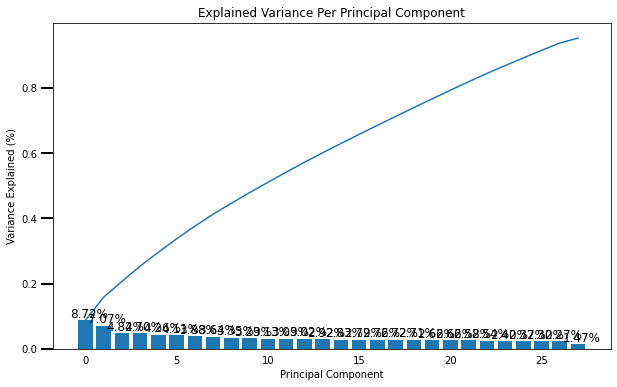

In [47]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca_plot(pca)

In [48]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

In [49]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))


Accuracy =  0.03415154749199573
--- Run time: 0.04 mins ---


In [50]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.13553895410885805
--- Run time: 0.13 mins ---


In [51]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.18036286019210246
--- Run time: 0.01 mins ---


In [52]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=1)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn = 1
predictions = MLKNN_classifier.predict(X_test_pca)

print(predictions)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


  (0, 222)	1
  (1, 165)	1
  (2, 106)	1
  (3, 50)	1
  (4, 207)	1
  (5, 230)	1
  (6, 118)	1
  (7, 144)	1
  (8, 183)	1
  (9, 107)	1
  (10, 179)	1
  (11, 179)	1
  (12, 206)	1
  (13, 139)	1
  (15, 168)	1
  (16, 58)	1
  (17, 135)	1
  (18, 144)	1
  (19, 115)	1
  (20, 190)	1
  (21, 140)	1
  (22, 113)	1
  (23, 230)	1
  (24, 156)	1
  (25, 5)	1
  (26, 90)	1
  (27, 61)	1
  (28, 135)	1
  (29, 193)	1
  (30, 61)	1
  (31, 110)	1
  (32, 199)	1
  (33, 123)	1
  (35, 213)	1
  (36, 130)	1
  (37, 187)	1
  (38, 88)	1
  (39, 146)	1
  (40, 92)	1
  (41, 126)	1
  (42, 111)	1
  (43, 182)	1
  (44, 7)	1
  (45, 126)	1
  (46, 138)	1
  (47, 107)	1
  (48, 125)	1
  (49, 211)	1
  (50, 138)	1
  (51, 61)	1
  (52, 107)	1
  (53, 241)	1
  (54, 204)	1
  (55, 126)	1
  (56, 110)	1
  (57, 13)	1
  (58, 92)	1
  (59, 147)	1
  (60, 232)	1
  (61, 140)	1
  (62, 77)	1
  (63, 158)	1
  (64, 5)	1
  (65, 63)	1
  (66, 111)	1
  (67, 125)	1
  (68, 67)	1
  (69, 68)	1
  (70, 163)	1
  (71, 43)	1
  (72, 49)	1
  (73, 60)	1
  (74, 58)	1
  (75, 173)	

In [ ]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,100), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

In [53]:
#See the predictions and translate them

#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
for i in range(len(y_test)):
    get_keys = [k for k, v in lables_dict.items() 
                if v in my_predictions[i]]

    print(f'{i+1}',get_keys)

1 ['floorid_258']
2 ['floorid_190']
3 ['floorid_131']
4 ['floorid_53']
5 ['floorid_240']
6 ['floorid_269']
7 ['floorid_143']
8 ['floorid_169']
9 ['floorid_212']
10 ['floorid_132']
11 ['floorid_207']
12 ['floorid_207']
13 ['floorid_239']
14 ['floorid_164']
15 []
16 ['floorid_194']
17 ['floorid_61']
18 ['floorid_160']
19 ['floorid_169']
20 ['floorid_140']
21 ['floorid_222']
22 ['floorid_165']
23 ['floorid_138']
24 ['floorid_269']
25 ['floorid_181']
26 ['floorid_6']
27 ['floorid_115']
28 ['floorid_64']
29 ['floorid_160']
30 ['floorid_225']
31 ['floorid_64']
32 ['floorid_135']
33 ['floorid_231']
34 ['floorid_148']
35 []
36 ['floorid_247']
37 ['floorid_155']
38 ['floorid_219']
39 ['floorid_113']
40 ['floorid_171']
41 ['floorid_117']
42 ['floorid_151']
43 ['floorid_136']
44 ['floorid_211']
45 ['floorid_8']
46 ['floorid_151']
47 ['floorid_163']
48 ['floorid_132']
49 ['floorid_150']
50 ['floorid_245']
51 ['floorid_163']
52 ['floorid_64']
53 ['floorid_132']
54 ['floorid_283']
55 ['floorid_237']

591 ['floorid_132']
592 ['floorid_217']
593 ['floorid_135']
594 ['floorid_118']
595 ['floorid_152']
596 ['floorid_150']
597 ['floorid_31']
598 ['floorid_144']
599 ['floorid_1']
600 ['floorid_189']
601 ['floorid_235']
602 ['floorid_117']
603 ['floorid_245']
604 ['floorid_220']
605 ['floorid_63']
606 ['floorid_163']
607 ['floorid_140']
608 ['floorid_230']
609 ['floorid_149']
610 ['floorid_152']
611 ['floorid_47']
612 ['floorid_190']
613 ['floorid_195']
614 ['floorid_218']
615 ['floorid_58']
616 ['floorid_197']
617 ['floorid_220']
618 ['floorid_58']
619 ['floorid_212']
620 ['floorid_147']
621 ['floorid_24']
622 ['floorid_165']
623 []
624 ['floorid_128']
625 ['floorid_35']
626 ['floorid_106']
627 ['floorid_183']
628 ['floorid_28']
629 ['floorid_146']
630 ['floorid_155']
631 ['floorid_46']
632 ['floorid_7']
633 ['floorid_1']
634 ['floorid_79']
635 ['floorid_212']
636 ['floorid_191']
637 ['floorid_155']
638 ['floorid_174']
639 ['floorid_268']
640 ['floorid_248']
641 ['floorid_145']
642 ['flo

In [44]:
# Load the validationData
validationData = r'C:\Users\Thesis2.0\django_thesis\KNN Algorithm\validationData.csv'
validationData = pd.read_csv(validationData)

In [54]:
#Prepare Data for Model

#Clean data
validationData  = clean_data(validationData)

#preprocess
X_valid, y_valid = preprocess_data(validationData)

#scale
X_valid = scaler.transform(X_valid)

#pca
X_valid_pca = pca.transform(X_valid)

print("Number of PCA Components = {}.".format(pca.n_components_))

print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))

#Convert to sparse matrix
X_valid_pca = lil_matrix(X_valid_pca).toarray()
y_valid = lil_matrix(y_valid).toarray()

Number of PCA Components = 28.
Total Variance Explained by PCA Components = 0.9520828199922157.


In [55]:
from joblib import dump, load
dump(MLKNN_1_classifier, 'MLKNN_1_classifier.joblib')

['MLKNN_1_classifier.joblib']

In [57]:
#load pickled model
MLKNN_1_classifier = load('MLKNN_1_classifier.joblib') 

In [58]:
# predict mlknn =1
valid_predictions = MLKNN_1_classifier.predict(X_valid_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_valid,valid_predictions))

AttributeError: 'NearestNeighbors' object has no attribute 'n_samples_fit_'